11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.6219 - loss: 1.2554 - val_accuracy: 0.9262 - val_loss: 0.2541
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9306 - loss: 0.2327 - val_accuracy: 0.9495 - val_loss: 0.1710
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9477 - loss: 0.1736 - val_accuracy: 0.9582 - val_loss: 0.1362
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - accuracy: 0.9599 - loss: 0.1360 - val_accuracy: 0.9663 - val_loss: 0.1121
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9650 - loss: 0.1162 - val_accuracy: 0.9692 - val_loss: 0.1001
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.9692 - loss: 0.1022 - val_accuracy: 0.9722 - val_loss: 0.0911
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.9721 - loss: 0.0930 - val_accuracy: 0.9747 - val_loss: 0.0796
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.9759 - loss: 0.0806 -

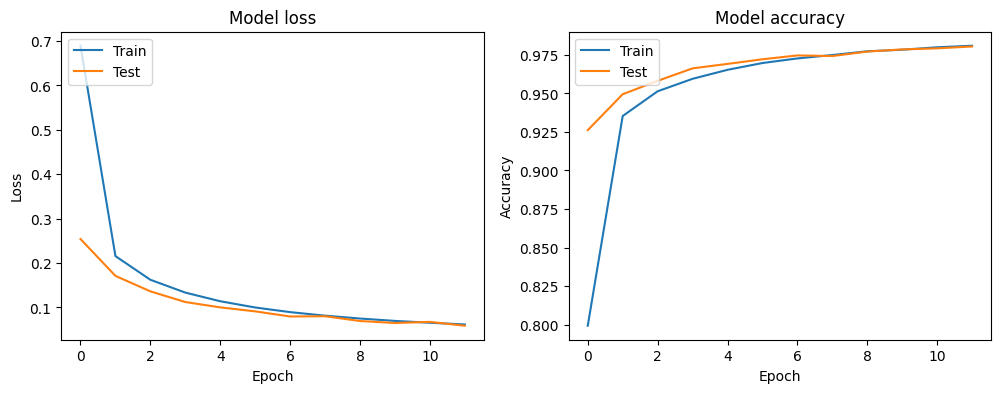

Test loss: 0.058789122849702835
Test accuracy: 0.9804999828338623


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt

def plot_history(plotdata):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(plotdata.plotdata['loss'])
    plt.plot(plotdata.plotdata['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(plotdata.plotdata['accuracy'])
    plt.plot(plotdata.plotdata['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# Compile the model using the Adadelta optimizer
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=Adadelta(learning_rate=0.1, rho=0.95),  # Removed decay parameter
    metrics=['accuracy']
)

# Train the model
plotdata = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
plot_history(plotdata)

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])